In [256]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
import re

In [257]:
data=pd.read_csv(r"D:\Projects_Ml\Sentiment_Analysis\Data\data_after_clean\english_sentiment_150k_balanced.csv")
data.sample(3)

,text,label
53835,Wonderful item....great pricing!!! [SEP] This ...,2
57048,Awful! [SEP] I tried this brand compared to th...,0
20378,good for health [SEP] I ordered them after rea...,1


In [258]:
data.isnull().sum()

text     0
label    0
dtype: int64

In [259]:
print(data['text'].duplicated().sum())

0


In [260]:
data['label'].value_counts()

label
2    80163
0    40000
1    29837
Name: count, dtype: int64

In [261]:
import nltk
nltk.download('stopwords')

from nltk.corpus import stopwords

EN_STOPWORDS = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [262]:
def clean_english(text):
    text = str(text).lower()

    # remove URLs, mentions, hashtags
    text = re.sub(r"http\S+|www\S+|@\w+|#\w+", "", text)

    # keep letters only
    text = re.sub(r"[^a-z\s]", " ", text)

    tokens = text.split()

    tokens = [
        word for word in tokens
        if word not in EN_STOPWORDS
        and len(word) > 2
    ]

    return " ".join(tokens)

In [263]:
data['clean_text'] = data['text'].apply(clean_english)
data.sample(3)

,text,label,clean_text
4607,My dogs like it [SEP] I have 2 large dogs who ...,2,dogs like sep large dogs allow lick every day ...
115120,My favorite K-Cup [SEP] Not sure how to rate s...,2,favorite cup sep sure rate something subjectiv...
126669,Save Your Money. [SEP] This coffee is not very...,0,save money sep coffee good buy reunion kona po...


In [264]:
data['word_len'] = data['clean_text'].apply(lambda x: len(x.split()))
data['char_len'] = data['clean_text'].apply(len)

data = data[['clean_text', 'label', 'word_len', 'char_len']]

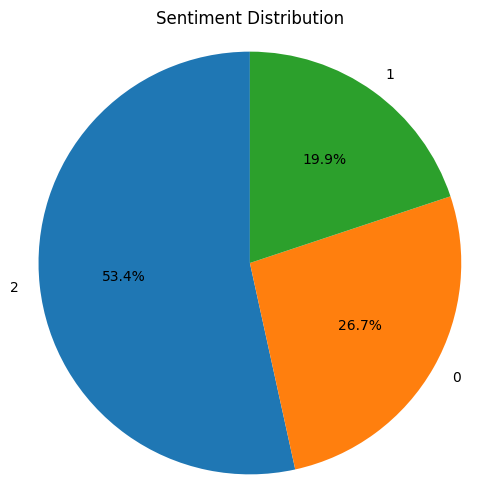

In [265]:
plt.figure(figsize=(6,6))

data['label'].value_counts().plot(kind='pie',autopct='%1.1f%%', startangle=90)

plt.title("Sentiment Distribution")
plt.ylabel("")   
plt.axis('equal')  
plt.show()


In [266]:
GENERAL_PHRASES = {
   "taste like", "tastes like", "much better",
    "pretty good", "grocery store","sep","product","coffee","one","tea"
}
def remove_general_phrases(text):
    text = text.lower()
    for phrase in GENERAL_PHRASES:
        text = text.replace(phrase, "")
    return " ".join(text.split())


data['clean_text'] = data['clean_text'].apply(remove_general_phrases)
data['clean_text']

0         cardboard heard people describe horrible food ...
1         thought would look cool son birthday cake expe...
2         basically hy flavored candy many people feel b...
3         delicous wish could find local grocery good lo...
4         best vanilla extract lot baking tryed lot diff...
                                ...                        
149995    best jerky favorite wish could get often away ...
149996    hot much hotter typical cayenne pepper hotness...
149997    yummy orange hot drink every seems like make t...
149998    terrrrific simply awesome love bold love frenc...
149999    delicious mocha tasty hint adjust thickness fr...
Name: clean_text, Length: 150000, dtype: object

In [267]:
from collections import Counter

words = []
for txt in english_texts:
    words.extend(txt.split())
word_freq = Counter(words)


In [269]:
# !pip install WordCloud

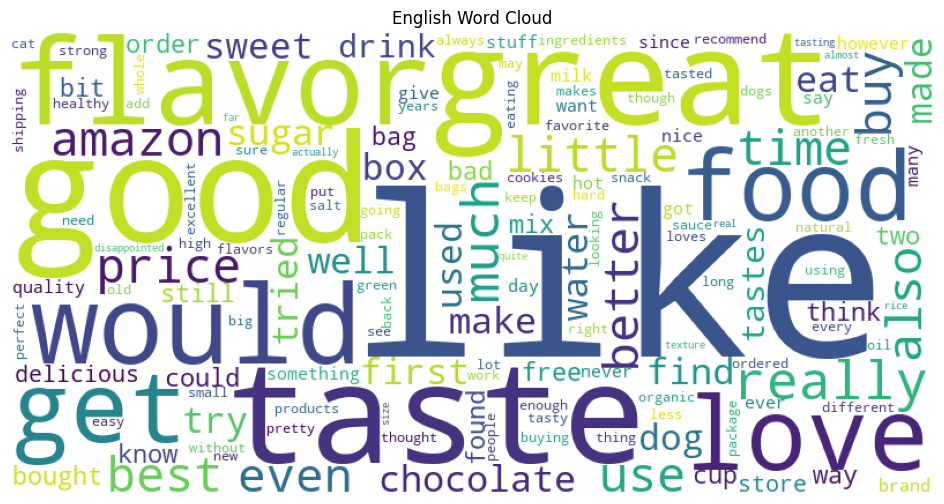

In [270]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

wc = WordCloud(
    width=800,
    height=400,
    background_color="white",
    max_words=150
)

wc.generate_from_frequencies(word_freq)

plt.figure(figsize=(12,6))
plt.imshow(wc.to_image())
plt.axis("off")
plt.title("English Word Cloud")
plt.show()
